<a href="https://colab.research.google.com/github/lakshmisudini14/Analysis-Of-911-Calls-Data-Using-Python/blob/main/Exploratory_Data_Analysis_of_the_911_Calls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (6, 4)

print('Required libraries have been installed successfully!')

Required libraries have been installed successfully!


In [6]:
# Load data
df = pd.read_csv('/content/911.csv')


# Inspecting the dataframe
print(df.info())

print(df.head())  # display first 5 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB
None
         lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;..

In [ ]:
#checking for 1st five rows of dataframe
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [ ]:
df['twp'].value_counts().head()

,count
twp,
LOWER MERION,8443
ABINGTON,5977
NORRISTOWN,5890
UPPER MERION,5227
CHELTENHAM,4575


In [ ]:
df['title'].nunique()

110

**Data Processing**
To improve the analysis, we can add new columns by splitting the existing data.

For example, in the title column, the text before the colon represents the "reason for call." We can create a new column called Reason using this information.

Let’s start by extracting the Reason feature.

In [7]:
df['reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [ ]:
df.tail()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS
99491,40.207055,-75.317952,MORRIS RD & S BROAD ST; UPPER GWYNEDD; 2016-08...,19446.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:17:02,UPPER GWYNEDD,MORRIS RD & S BROAD ST,1,Traffic


In [ ]:
df['reason'].value_counts()

,count
reason,
EMS,48877
Traffic,35695
Fire,14920


<Axes: xlabel='count', ylabel='reason'>

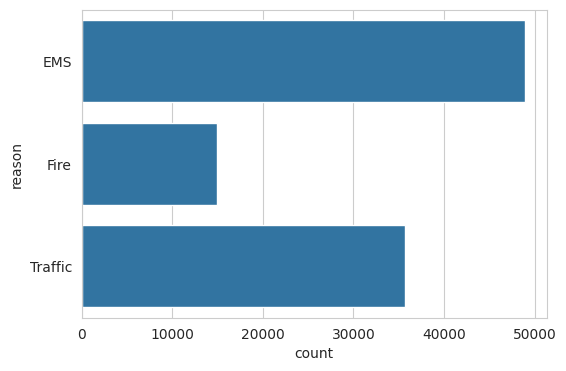

In [ ]:
sns.countplot(df['reason'])

Let's deal with the time information we have. Checking the datatype of the timestamp column.

In [ ]:
type(df['timeStamp'][0])

str

Since timestamps are stored as strings, converting them into Python DateTime objects will simplify our work. This conversion will allow us to easily extract details like the year, month, and day.

In [ ]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

For a single DateTime object, we can extract information as follows.

In [ ]:
time = df['timeStamp'].iloc[0]

print('Hour:', time.hour)
print('Month:',time.month)
print('Day of week:',time.dayofweek)

Hour: 17
Month: 12
Day of week: 3


Now lets add new columns to extract above information from each row of timestamp.

In [ ]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['dayofweek'] = df['timeStamp'].apply(lambda x: x.dayofweek)

In [ ]:
df.head(4)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3


The Day of the Week is represented as an integer, which might not immediately indicate the corresponding day. To make it more understandable, we can map these numbers to their respective days, such as Monday through Sunday.

In [ ]:
daymap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [ ]:
df['dayofweek'] = df['dayofweek'].map(daymap)

df.tail(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,dayofweek
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,11,8,Wed
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,11,8,Wed
99491,40.207055,-75.317952,MORRIS RD & S BROAD ST; UPPER GWYNEDD; 2016-08...,19446.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:17:02,UPPER GWYNEDD,MORRIS RD & S BROAD ST,1,Traffic,11,8,Wed


Let's analyze the data by using newly added columns.

<Axes: xlabel='count', ylabel='dayofweek'>

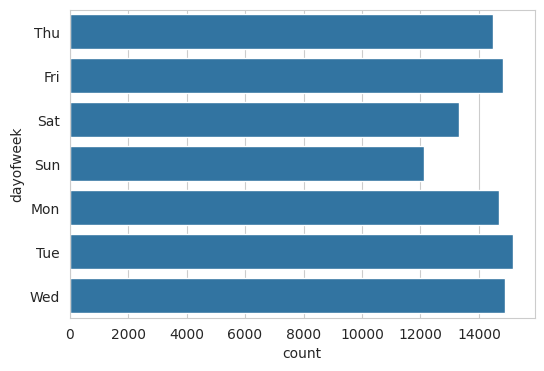

In [ ]:
sns.countplot(df['dayofweek'])

An important observation is that the number of calls received during weekends is lower compared to weekdays.

To explore this further, let's analyze the number of calls received per day for each reason.

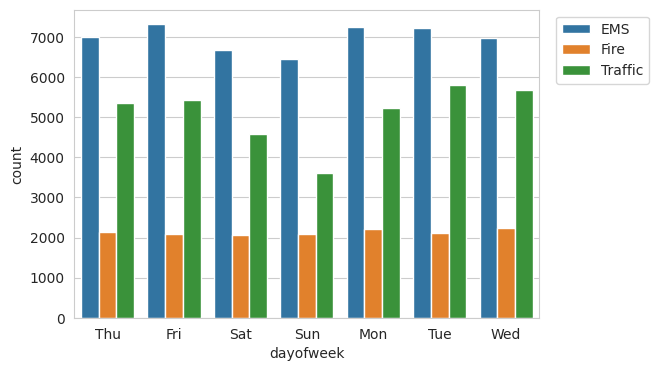

In [ ]:
sns.countplot(x=df['dayofweek'],hue=df['reason'])
plt.legend(bbox_to_anchor=(1.25,1))

We observe that 'Traffic'-related calls are noticeably lower during weekends, which could explain why the total number of calls is also lower on weekends compared to weekdays.

Next, let’s analyze the relationship between the number of calls and the month.

In [ ]:
byMonth = df.groupby(by='Month').count()

Text(0, 0.5, 'Number of Calls')

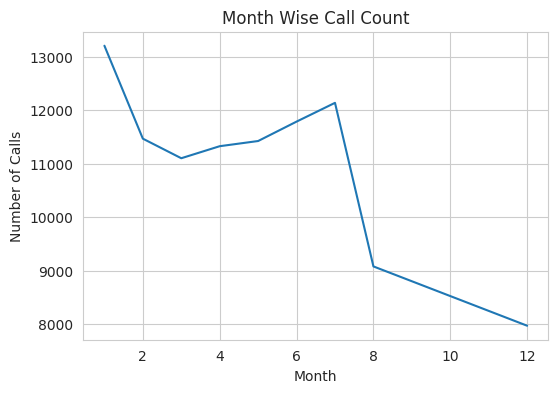

In [ ]:
byMonth['title'].plot.line(y='title')
plt.title('Month Wise Call Count')
plt.ylabel('Number of Calls')

It appears that emergency calls are fewer during the holiday seasons.

Now, let’s create a heatmap to visualize the counts of calls for each hour across the days of the week.

In [ ]:
day_hour = df.pivot_table(values='title',index='dayofweek',columns='Hour',aggfunc='count')

day_hour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayofweek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


Now create a HeatMap using this new DataFrame.

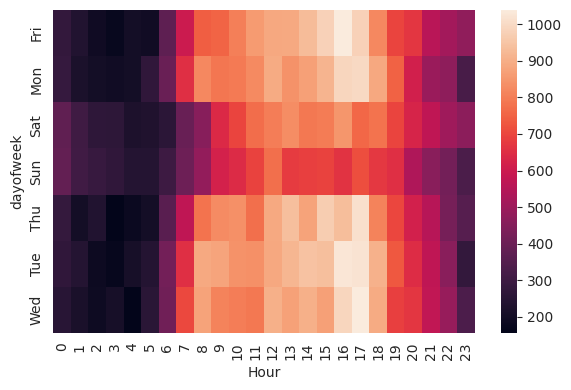

In [ ]:
sns.heatmap(day_hour)
plt.tight_layout()

We observe that the majority of calls occur around the end of office hours on weekdays.

With that, we conclude this **exploratory analysis project**.